<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### Basic EDA
___

In [3]:
# Load the data
house = pd.read_csv('./housing.csv')
descriptions = open('./data_description.txt', 'r')

In [4]:
print descriptions.read()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
house.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


Looking at the data, there a lot of missing values. The feature 'Id' is essentially useless to have. 
There are many features which are catergorical and some with values of 0 which will not be useful in modelling. 

In [5]:
#Drop the ID column as it will not be of any use

house = house.drop('Id', axis=1)

Looking at the volume of data we will be working with.

In [6]:
house.shape

(1460, 80)

There are 1460 houses and 80 features which includes 'SalePrice' which will be the target vector to predict.

In [7]:
#The features in the dataset
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

Understanding the type of data we are working with.

In [8]:
house.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

The features includes 3 different types. Namely integers, objects and floats. 

Figuring out which types columns are of which types.

In [9]:
print 'Objects:', house.columns[house.dtypes == object] 

print 'Integers:', house.columns[house.dtypes == int]

print 'Floats: ', house.columns[house.dtypes == float]


Objects: Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')
Integers: Index([u'MSSubClass', u'LotArea', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BsmtFullBath', u'BsmtHalfBath

Looking at the feature 'MSSubClass', it is in scalar ranking with no specific reference to the number that was assigned.

We will change it into something categorical.

In [10]:
MSSubClass_remap = {20:'OneStory1946New', 30:'OneStory1945Old', 40:'OneStory', 45:'OneHalfStoryUF',
                    50:'OneHalfStoryF', 60:'TwoStory1946New', 70:'TwoStory1945Old', 75:'TwoHalfStory',
                    80:'SplitMultiLevel', 85:'SplitFoyer', 90:'Duplex', 120:'OneStoryPUD1946New',
                    150:'OneHalfStoryPUD', 160:'TwoStoryPUD1946New', 180:'PUDMultiLevel', 190:'TwoFamConv'}

Replace the 'MSSubClass'

In [11]:
house.MSSubClass.replace(MSSubClass_remap, inplace=True)

### Cleaning The Data Set
___

#### Figuring Out The Data

As we are using Patsy later on, we need to rename the features that start with an integer.

In [12]:
house = house.rename(columns={'1stFlrSF':'FirstFlrSF', 
                     '2ndFlrSF':'SecondFlrSF', 
                     '3SsnPorch':'ThreePorch'})

Checking out the number of nulls in the dataset.

In [13]:
house.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

There are 19 features with missing values, with 4 features ('PoolQC', 'MiscFeature', 'Alley', 'Fence') with more than 1000 missing values. 

It renders these features worthless as they will be poor predictors of the sale price given that 80-95% of the houses won't contain these features.

Nevertheless these could come in handy later and we have to be careful with dropping these features so early without looking at them further.

<b>Actual Missing Data:</b>
1. LotFrontage: 259 missing values
2. MasVnrArea and MasVnrType: 8 missing values
3. Electrical: 1 missing value
4. BsmnFinType2: 1 missing value (Unf: incomplete basement)

<b>Not Actually Missing:</b>
1. PoolQC: 1453 missing values (does not have a pool)
2. MiscFeature: 1406 missing values (does not have misc feature)
3. Alley: 1369 missing values (does not have alley access)
4. Fence: 1179 missing values (does not have fence)
5. FireplaceQu: 690 missing values (does not have a fireplace)
6. GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual: 81 missing values (does not have a garage)
7. BsmtExposure: 37 missing values (does not have a asement)

With reference from description.txt, the data is largely complete with some exceptions. 

Some of the other features with missing values are actually houses without the feature. 

So we can proceed to fill the missing values.
___

#### Electrical

Filling the missing value with the mode 'SBrkr'

In [14]:
house.loc[house['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [15]:
house.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Features That Are Objects

Filling the missing value with 'None'

In [16]:
for col in house.columns[house.isnull().sum() > 0]:
    if house[col].dtype == object:
        print '--------------Before Fill--------------'
        print house[col].value_counts()
        house[col] = house[col].fillna('None')
        print '--------------After Fill--------------'
        print house[col].value_counts()

--------------Before Fill--------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------After Fill--------------
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------Before Fill--------------
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
--------------After Fill--------------
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
--------------Before Fill--------------
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
--------------After Fill--------------
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
--------------Before Fill--------------
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
--------------After Fill--------------
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
--------------Before Fill--------------
No    953
Av    221
Gd  

In [17]:
house.isnull().sum().sort_values(ascending=False)[0:5]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
SalePrice        0
Foundation       0
dtype: int64

#### Features That Are Float or Integer

The missing values in 'GarageYrBlt' corresponds to the houses with no garage built. As it is a float type, it's not possible to fill 'None'. 

Other options include 
1. Imputing with either YearBuilt or YearRemodAdd. 
2. Imputing with the mean of YearBuilt and YearRemodAdd.


In [18]:
counter = 0
for x in house[house.GarageYrBlt.notnull()][['GarageYrBlt', 'YearBuilt']].values:
    if x[0] == x[1]:
        counter += 1
        
print counter        

1089


1089 of the houses with values for 'GarageBuilt' matches the value in 'YearBuilt'.This accounts for at least 75% of the dataset. We can assume that the year the garage was built is also the year that the house was built. 

In [19]:
house.loc[house['GarageYrBlt'].isnull(), 'GarageYrBlt'] = house[house['GarageYrBlt'].isnull()]['YearBuilt']

In [20]:
house.isnull().sum().sort_values(ascending=False)[0:3]

LotFrontage    259
MasVnrArea       8
SalePrice        0
dtype: int64

For 'MasVnrArea', we will fill it with 'None' as we did with the other features.

In [21]:
house.loc[house['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [22]:
house.isnull().sum().sort_values(ascending=False)[0:3]

LotFrontage    259
SalePrice        0
BsmtQual         0
dtype: int64

With 'LotFrontage' we can fill with either the mean or the median value. 

In [23]:
house.LotFrontage = house.LotFrontage.fillna(np.mean(house.LotFrontage))

In [24]:
house.isnull().sum().sort_values(ascending=False)

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
                ..
PoolArea         0
GarageCars       0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageArea       0
GarageFinish     0
Electrical       0
HalfBath         0
FirstFlrSF       0
SecondFlrSF      0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
BedroomAbvGr     0
GarageYrBlt 

Next is to remove any houses that are not for residential purposes.

In [25]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

We can see that there are 10 houses that are zoned as commercial use. We will remove those

In [26]:
house = house.drop(house[(house.MSZoning == 'C (all)')].index)

house.MSZoning.value_counts()


RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [27]:
house.shape

(1450, 80)

We have removed the houses that are non-residential.
Now the dataset is cleaned and we are left with 1450 houses and 80 features.
___

## Estimating the sale price based on 'fixed' characteristics.
___

We will first identify the features that are considered 'fixed'.

In [28]:
fixed = house[['SaleCondition', 'MSSubClass', 'MSZoning', 
         'LotFrontage', 'LotArea', 'Street', 
         'Alley', 'LotShape', 'LandContour', 
         'LotConfig', 'LandSlope', 'Neighborhood', 
         'Condition1', 'Condition2', 'BldgType', 
         'HouseStyle', 'YearBuilt', 'YearRemodAdd', 
         'Foundation', 'BsmtQual', 'BsmtExposure',
         'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
         'FirstFlrSF', 'SecondFlrSF', 'GrLivArea', 
         'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
         'HalfBath', 'Fireplaces', 'GarageType', 
         'GarageYrBlt', 'GarageCars', 'GarageArea', 
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
         'ThreePorch', 'ScreenPorch', 'PoolArea', 
         'MoSold',  'BedroomAbvGr', 'KitchenAbvGr', 
         'TotRmsAbvGrd','YrSold', 'SalePrice']].copy()

In [29]:
fixed.dtypes

SaleCondition     object
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
YearBuilt          int64
YearRemodAdd       int64
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
FirstFlrSF         int64
SecondFlrSF        int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
Fireplaces         int64
GarageType        object
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ThreePorch         int64


In [30]:
str_col = fixed.columns[fixed.dtypes == object]

Using LabelEncoder to convert categorical to numerical

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in str_col:
    fixed[i] = le.fit_transform(fixed[i])

In [32]:
print fixed.dtypes

SaleCondition      int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
YearBuilt          int64
YearRemodAdd       int64
Foundation         int64
BsmtQual           int64
BsmtExposure       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
TotalBsmtSF        int64
FirstFlrSF         int64
SecondFlrSF        int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
Fireplaces         int64
GarageType         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ThreePorch         int64


## Correlation
___

In [33]:
corr = fixed.corr()['SalePrice']
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
GrLivArea        0.708658
GarageCars       0.642135
GarageArea       0.629831
TotalBsmtSF      0.612088
FirstFlrSF       0.603300
FullBath         0.556674
TotRmsAbvGrd     0.533355
YearBuilt        0.517602
GarageYrBlt      0.506338
YearRemodAdd     0.501186
Fireplaces       0.463264
BsmtFinSF1       0.384475
Foundation       0.383525
LotFrontage      0.337567
OpenPorchSF      0.329491
WoodDeckSF       0.320770
SecondFlrSF      0.319774
MSSubClass       0.283889
HalfBath         0.280882
LotArea          0.264715
BsmtFullBath     0.224054
Neighborhood     0.208042
SaleCondition    0.200414
HouseStyle       0.176170
BedroomAbvGr     0.162008
ScreenPorch      0.110540
Alley            0.092629
PoolArea         0.092396
Condition1       0.089142
LandSlope        0.058859
MoSold           0.051987
ThreePorch       0.043807
Street           0.013700
LandContour      0.009866
Condition2       0.004049
BsmtFinSF2      -0.014145
BsmtHalfBath    -0.017561
YrSold      

Looking at the correlation, it can be observed that GrLivArea, GarageArea and TotalBsmtSF are quite strongly correlated to SalePrice.

In [34]:
fixed_corr = fixed.corr()

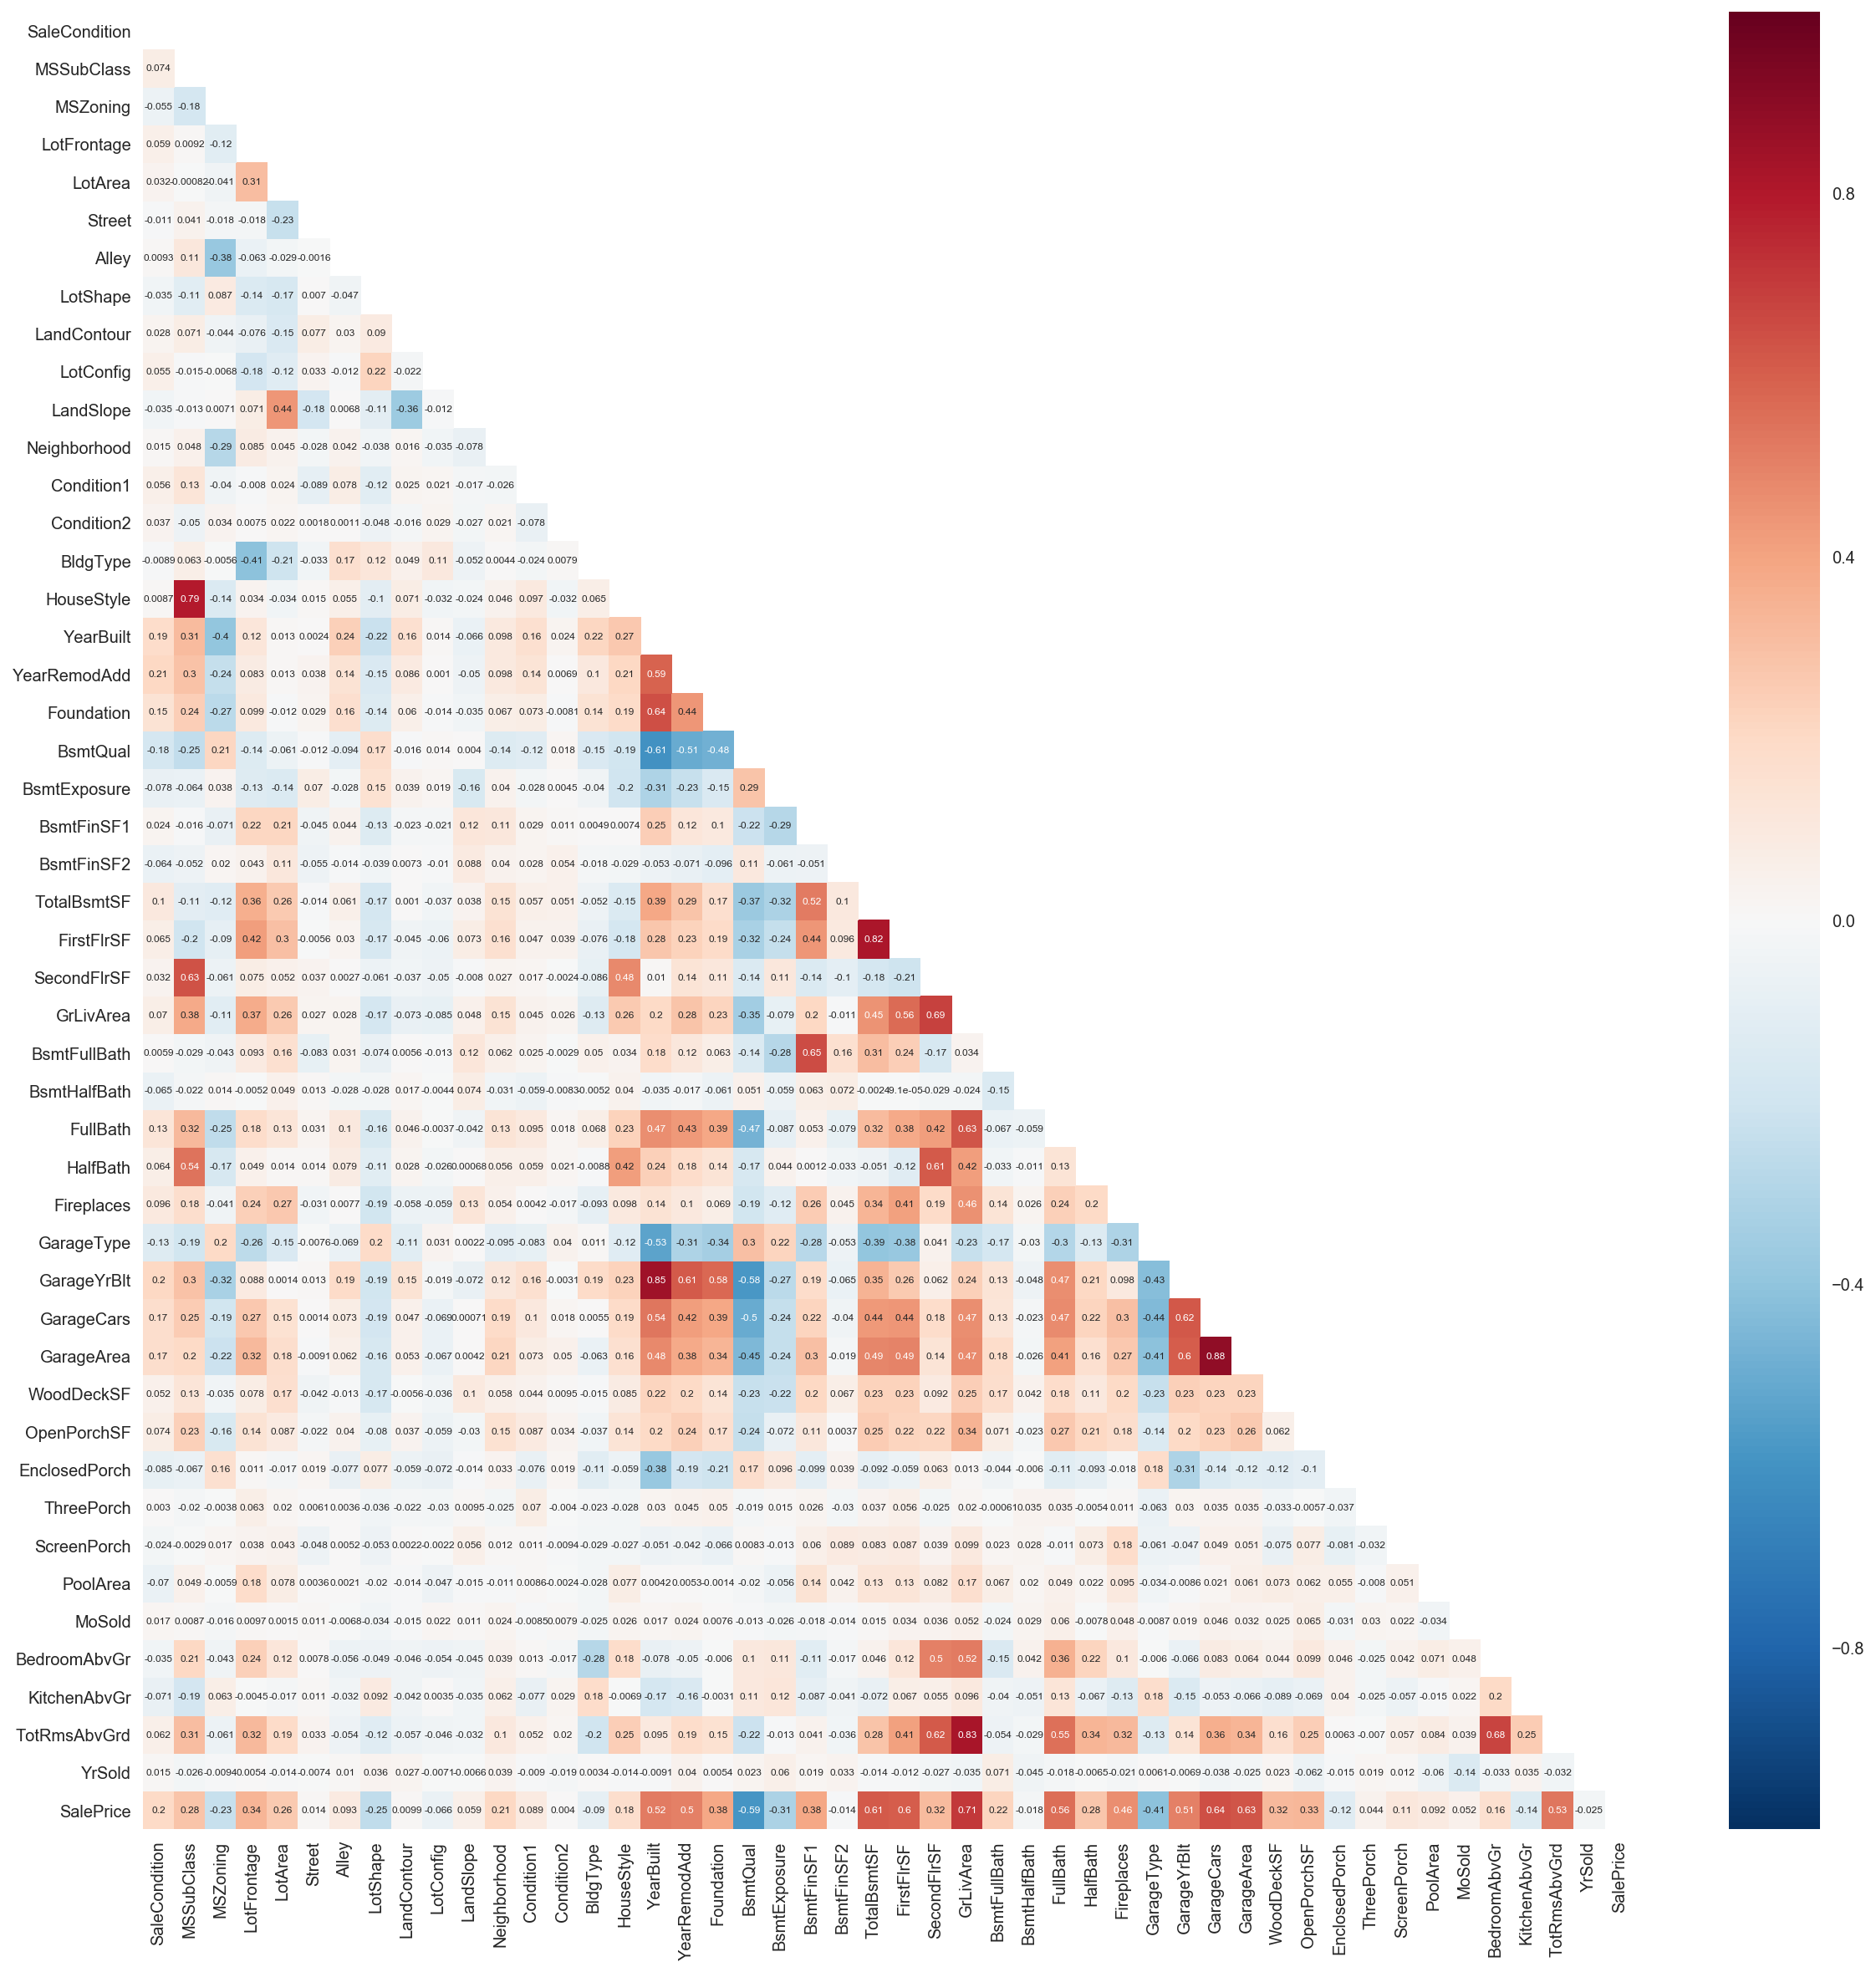

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

mask = np.zeros_like(fixed_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(fixed_corr, annot_kws={'size':6}, mask=mask, ax=ax, annot=True)

plt.show()

## Linear Regression
___

In [36]:
X = fixed.drop('SalePrice', axis=1)
y = fixed.SalePrice

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

predict_house = pd.DataFrame()
predict_house['Price'] = lr.predict(X)
lr.score(X, y)

0.7933928949583966

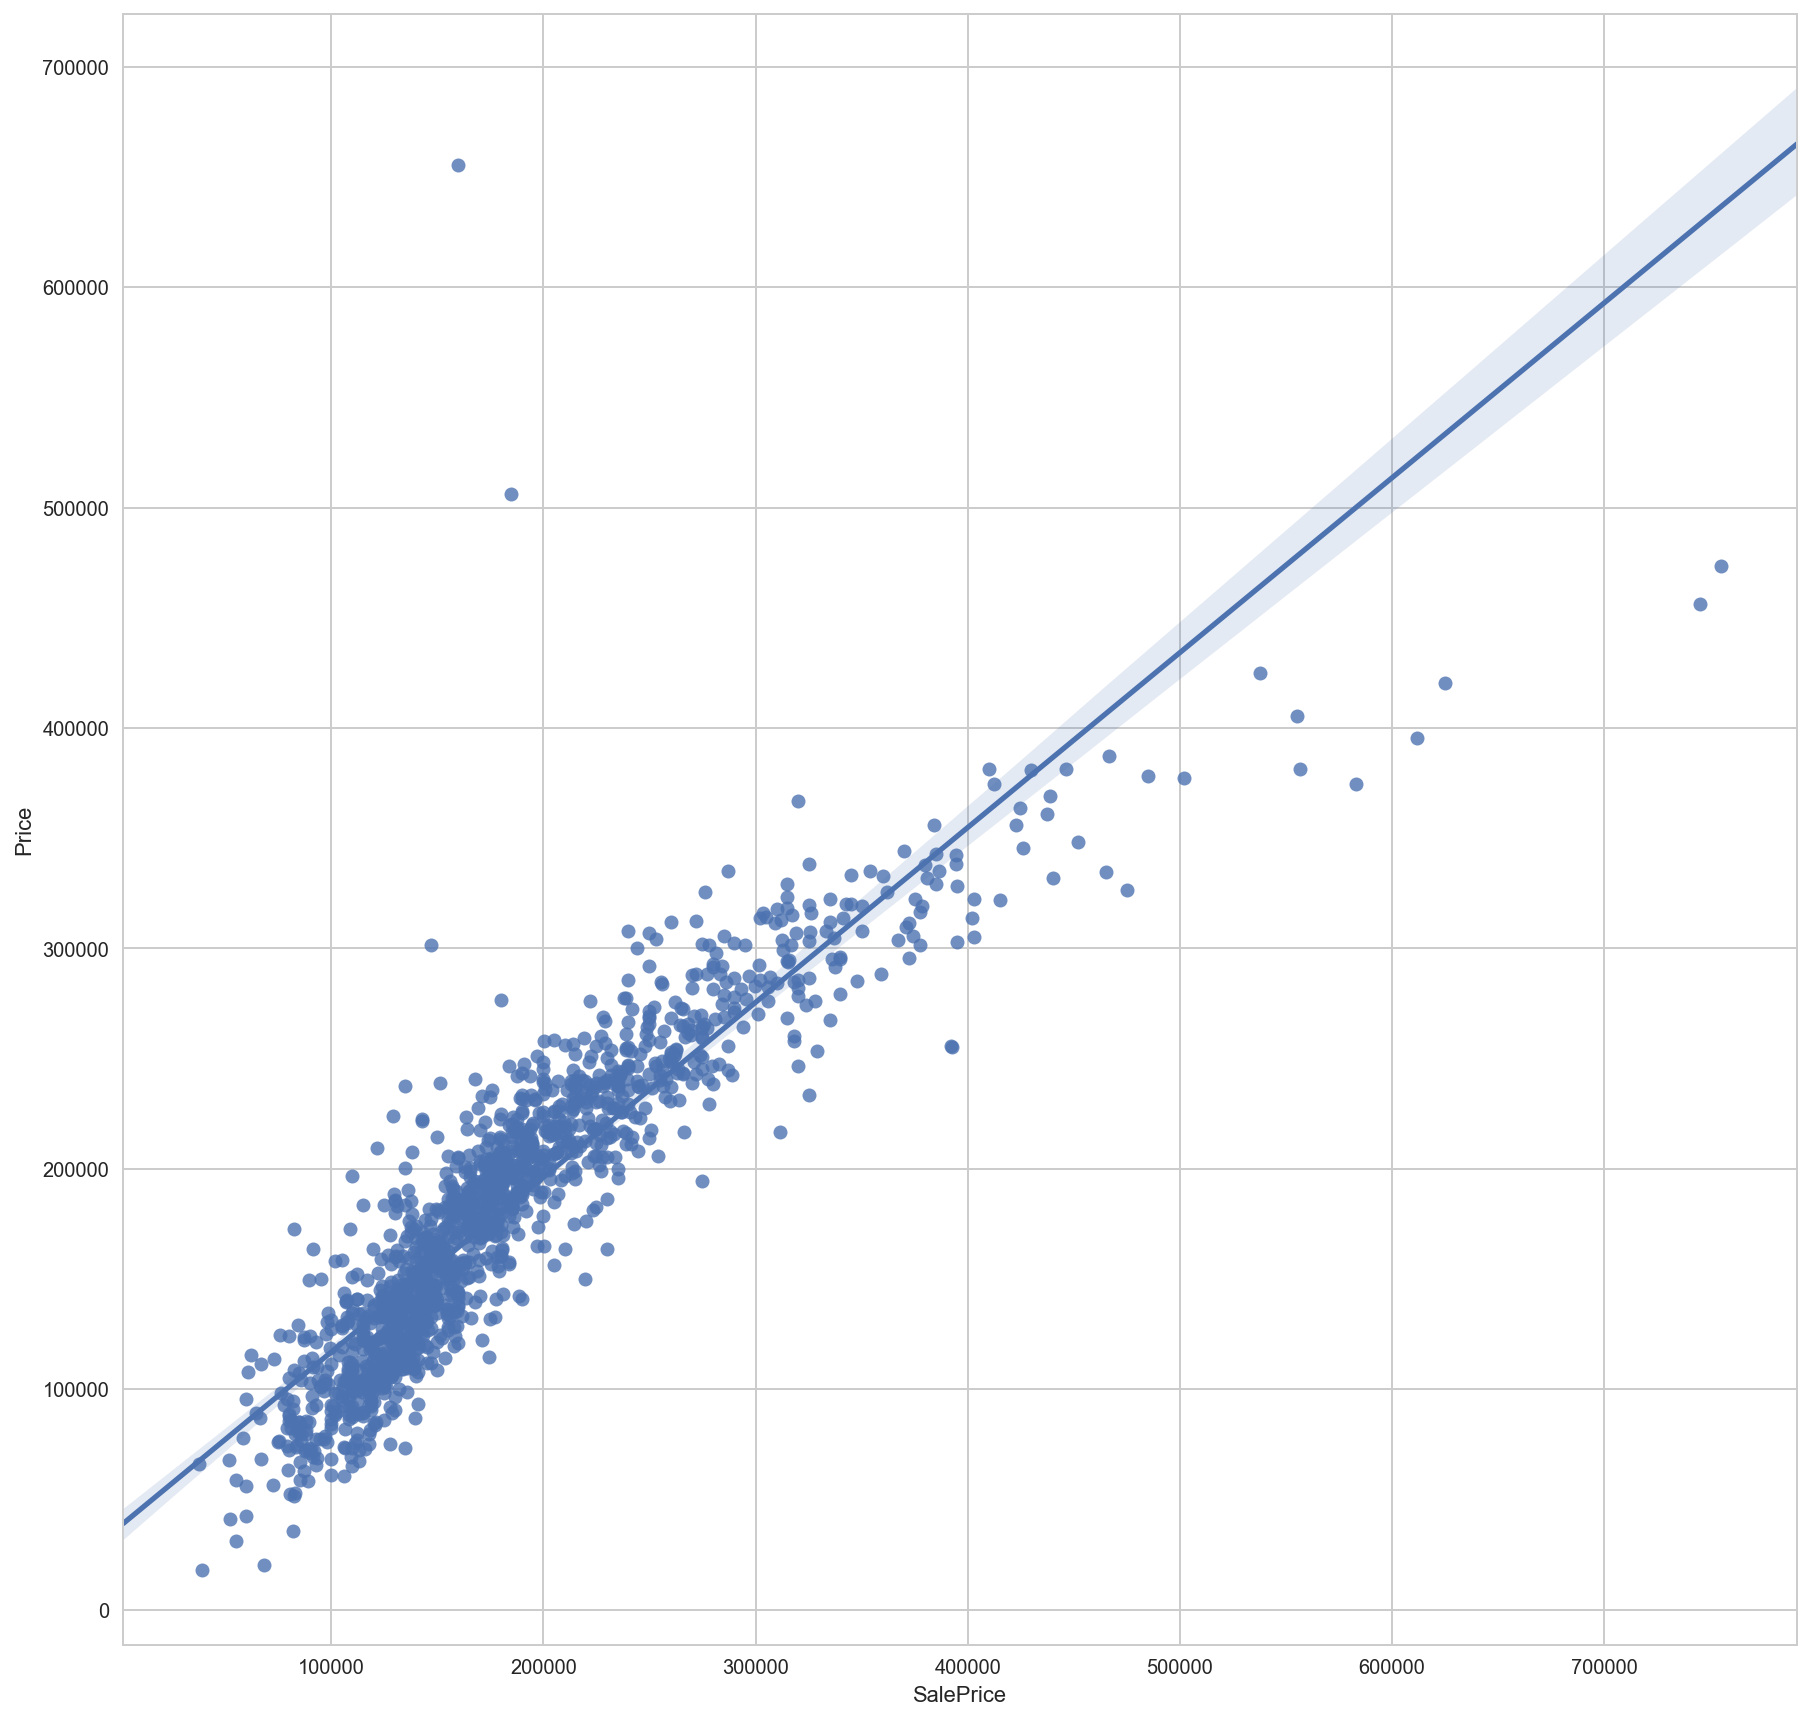

In [37]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

axis0 = sns.regplot(y, predict_house['Price'], ax=ax)

Prepare the data for testing.

In [38]:
house_pre2010 = fixed[fixed.YrSold < 2010]
house_2010 = fixed[fixed.YrSold == 2010]

Xtr = house_pre2010.drop('SalePrice', axis=1)
Xte = house_2010.drop('SalePrice', axis=1)

Standardising with StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(Xtr)
Xs_test = ss.fit_transform(Xte)

y_train = house_pre2010.SalePrice
y_test = house_2010.SalePrice

In [40]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression(normalize=True)

model = lm.fit(Xs_train, y_train)
prediction = lm.predict(Xs_test)

print 'Score: ', model.score(Xs_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error((y_test), prediction))

Score:  0.830010219767
RMSE:  32873.8935363


## Ridge Regression
___

In [41]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(Xs_train, y_train)
y_pred = ridgereg.predict(Xs_test)

print 'Score: ', ridgereg.score(Xs_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score:  0.830010219767
RMSE:  32873.8935363


## Lasso Regression
___

In [42]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(Xs_train, y_train)
y_pred = lassoreg.predict(Xs_test)

print 'Score: ', lassoreg.score(Xs_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score:  0.830007603199
RMSE:  32874.1465411


In [43]:
print 'LM Score: ', model.score(Xs_test, y_test)
print 'LM RMSE: ', np.sqrt(metrics.mean_squared_error((y_test), prediction))

print 'Ridge Score: ', ridgereg.score(Xs_test, y_test)
print 'Ridge RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print 'Lasso Score: ', lassoreg.score(Xs_test, y_test)
print 'Lasso RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

LM Score:  0.830010219767
LM RMSE:  32873.8935363
Ridge Score:  0.830010219767
Ridge RMSE:  32874.1465411
Lasso Score:  0.830007603199
Lasso RMSE:  32874.1465411


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [44]:
renovate = house[['Condition1', 'Condition2', 'OverallQual', 
                  'OverallCond', 'RoofStyle', 'RoofMatl', 
                  'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                  'ExterQual', 'ExterCond', 'BsmtQual', 
                  'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                  'BsmtUnfSF', 'Heating', 'HeatingQC', 
                  'CentralAir', 'Electrical', 'LowQualFinSF', 
                  'KitchenQual', 'Functional', 'GarageFinish', 
                  'GarageQual', 'GarageCond','SaleCondition', 
                  'YrSold', 'SalePrice']].copy()

In [45]:
str_cols = renovate.columns[renovate.dtypes==object]
str_cols

Index([u'Condition1', u'Condition2', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'BsmtQual',
       u'BsmtCond', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'SaleCondition'],
      dtype='object')

In [46]:
renovate.shape

(1450, 29)

Using LabelEncoder to convert categorical to numerical

In [47]:
for i in str_cols:
    renovate[i] = le.fit_transform(renovate[i])

renovate.dtypes

Condition1       int64
Condition2       int64
OverallQual      int64
OverallCond      int64
RoofStyle        int64
RoofMatl         int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
ExterQual        int64
ExterCond        int64
BsmtQual         int64
BsmtCond         int64
BsmtFinType1     int64
BsmtFinType2     int64
BsmtUnfSF        int64
Heating          int64
HeatingQC        int64
CentralAir       int64
Electrical       int64
LowQualFinSF     int64
KitchenQual      int64
Functional       int64
GarageFinish     int64
GarageQual       int64
GarageCond       int64
SaleCondition    int64
YrSold           int64
SalePrice        int64
dtype: object

In [48]:
Xr = renovate.drop(['YrSold', 'SalePrice'], axis=1)
yr = renovate.SalePrice

In [49]:
renovate_pre2010 = renovate[renovate.YrSold < 2010]
renovate_2010 = renovate[renovate.YrSold == 2010]

Xrtr_pre2010 = renovate_pre2010.drop(['YrSold', 'SalePrice'], axis=1)
Xrte_2010 = renovate_2010.drop(['YrSold', 'SalePrice'], axis=1)

In [50]:
scaler = StandardScaler()
Xr_train = scaler.fit_transform(Xrtr_pre2010)
Xr_test = scaler.fit_transform(Xrte_2010)

In [51]:
y_train = renovate_pre2010.SalePrice
y_test = renovate_2010.SalePrice

In [52]:
lm = linear_model.LinearRegression(normalize=True)

model = lm.fit(Xr_train, y_train)
prediction = lm.predict(Xr_test)

print 'Score: ', model.score(Xr_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error((y_test), prediction))

Score:  0.708045094238
RMSE:  43082.1756156


## Ridge Regression
___

In [53]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(Xr_train, y_train)
y_pred = ridgereg.predict(Xr_test)

print 'Score: ', ridgereg.score(Xr_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score:  0.708045094238
RMSE:  43082.1756156


## Lasso Regression
___

In [54]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(Xr_train, y_train)
y_pred = lassoreg.predict(Xr_test)

print 'Score: ', lassoreg.score(Xr_test, y_test)
print 'RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Score:  0.708046003571
RMSE:  43082.1085229


In [55]:
print 'LM Score: ', model.score(Xr_test, y_test)
print 'LM RMSE: ', np.sqrt(metrics.mean_squared_error((y_test), prediction))

print 'Ridge Score: ', ridgereg.score(Xr_test, y_test)
print 'Ridge RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print 'Lasso Score: ', lassoreg.score(Xr_test, y_test)
print 'Lasso RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

LM Score:  0.708045094238
LM RMSE:  43082.1756156
Ridge Score:  0.708045094238
Ridge RMSE:  43082.1085229
Lasso Score:  0.708046003571
Lasso RMSE:  43082.1085229


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [56]:
# A: